<!DOCTYPE html>
<html>
<head>
<style>
h1{
  text-shadow: 2px 2px 5px red;
   font-family: "Lucida Console", "Courier New", monospace;
   }

</style>
</head>
<body>

<h1> <center><br>  ARIMA MODEL FORECASTING  <br><br></h1>

</body>
</html>



In [49]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose



In [50]:
df=pd.read_csv('actual.csv')


In [54]:
df

,Month,sales
0,2010-01,2121
1,2010-02,3911
2,2010-03,2100
3,2010-04,4140
4,2010-05,1410
...,...,...
139,2021-08,6120
140,2021-09,1770
141,2021-10,7020
142,2021-11,5140


In [51]:
df.shape

(144, 2)

In [52]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.sales.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.351390
p-value: 0.000004


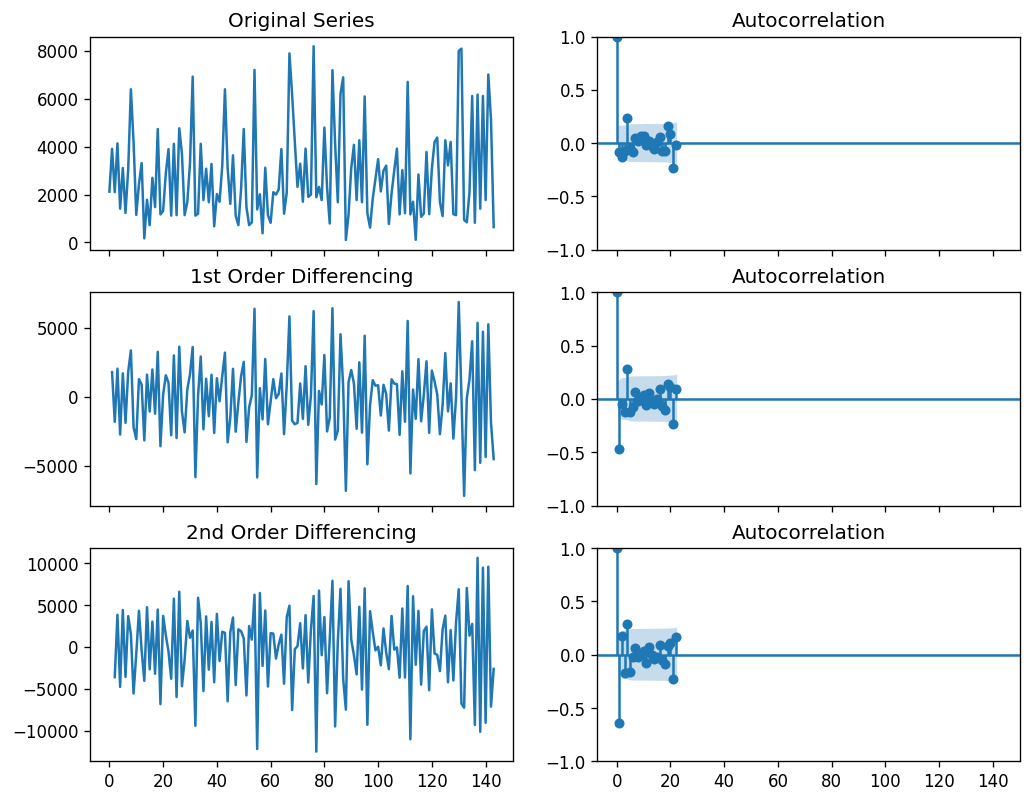

In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.sales); axes[0, 0].set_title('Original Series')
plot_acf(df.sales, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.sales.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.sales.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.sales.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.sales.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

C:\Users\shlok\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


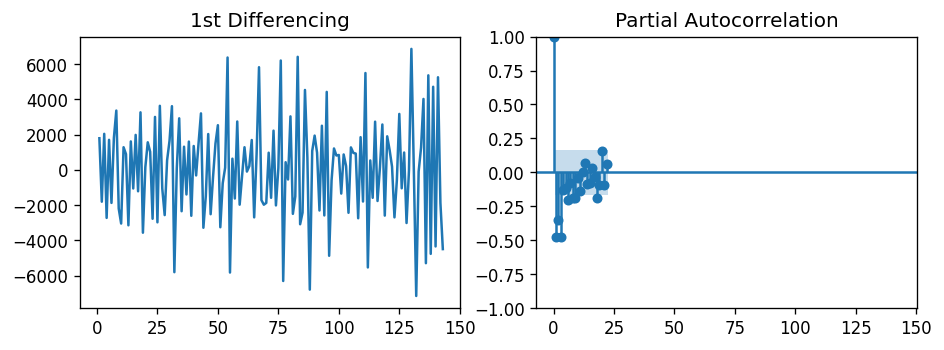

In [56]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.sales.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.sales.diff().dropna(), ax=axes[1])

plt.show()

In [68]:
from statsmodels.tsa.arima.model import ARIMA


# 1,1,2 ARIMA Model
model = ARIMA(df.sales, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  144
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1288.343
Date:                Wed, 21 Dec 2022   AIC                           2584.687
Time:                        16:26:52   BIC                           2596.538
Sample:                             0   HQIC                          2589.502
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9740      0.086    -11.281      0.000      -1.143      -0.805
ma.L1         -0.0369      0.118     -0.314      0.754      -0.268       0.194
ma.L2         -0.9400      0.117     -8.018      0.0

In [69]:
# 1,1,1 ARIMA Model
model = ARIMA(df.sales, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1288.594
Date:                Wed, 21 Dec 2022   AIC                           2583.187
Time:                        16:27:18   BIC                           2592.076
Sample:                             0   HQIC                          2586.799
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0717      0.074     -0.968      0.333      -0.217       0.074
ma.L1         -0.9990      0.332     -3.008      0.003      -1.650      -0.348
sigma2      3.809e+06   1.12e+06      3.400      0.0

C:\Users\shlok\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


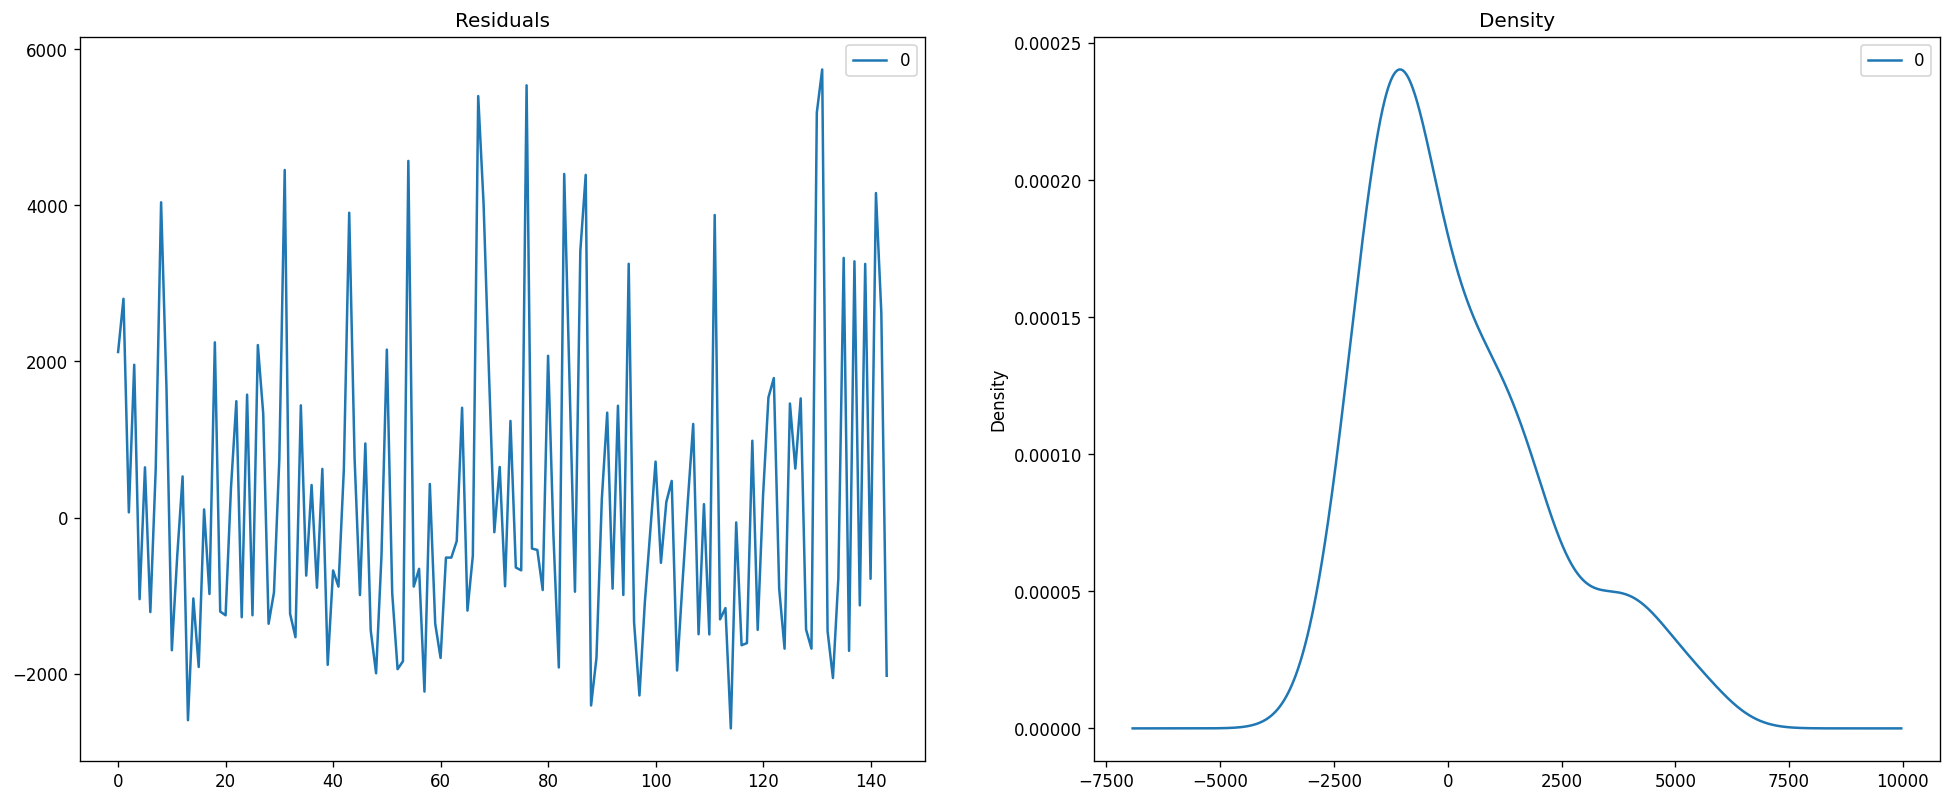

In [70]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)

fig, ax = plt.subplots(1,2,figsize=(20,8))


residuals.plot(title="Residuals", ax=ax[0])


residuals.plot(kind='kde', title='Density', ax=ax[1])

plt.show()

In [71]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.sales[:110]
test = df.sales[110:]

# **12. Auto Arima Forecasting in Python** <a class="anchor" id="12"></a>


[Table of Contents](#0.1)


- In Python, the `pmdarima` package provides `auto_arima()` function which can be used to automate the process of ARIMA Forecasting in Python.

- `auto_arima()` uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

- We need to install the `pmdarima` package first.

In [72]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(df.sales, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2755.475, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2677.089, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2714.596, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2659.208, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2647.166, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2594.441, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2593.745, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2594.461, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2596.202, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2597.020, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2596.310, Time=0.06 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
T

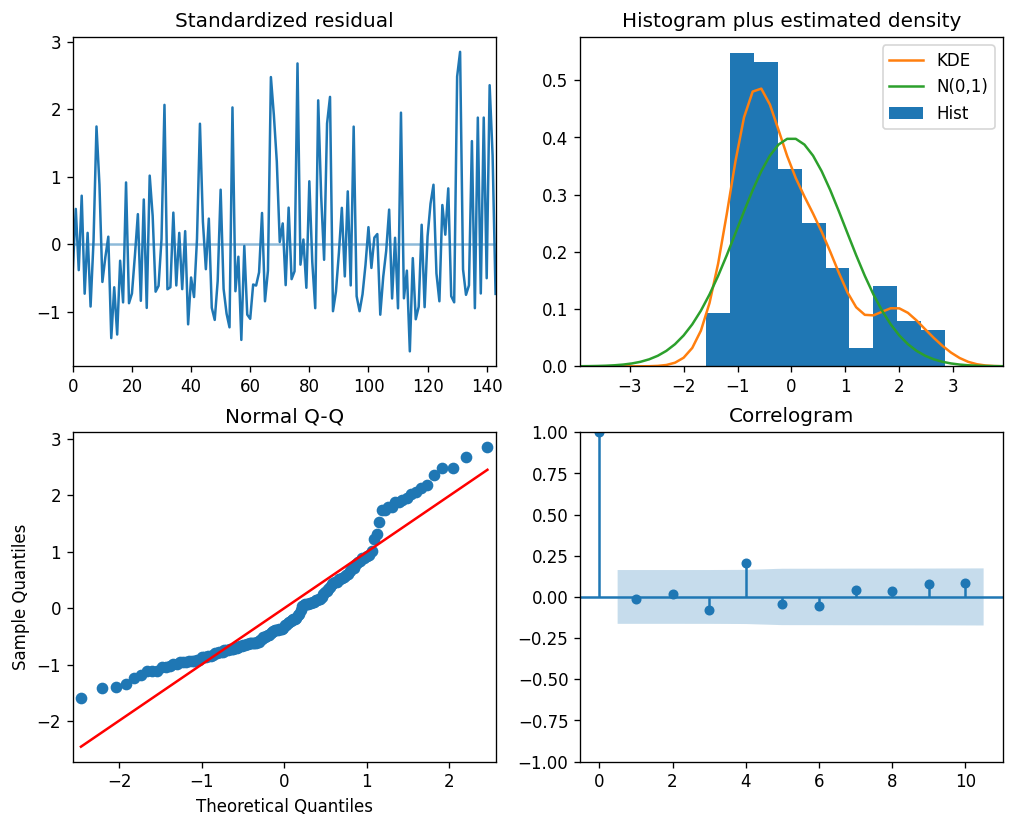

In [73]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

# **14. SARIMA model in python** <a class="anchor" id="14"></a>


[Table of Contents](#0.1)


- The plain ARIMA model has a problem. It does not support seasonality.


- If the time series has defined seasonality, then we should go for **Seasonal ARIMA** model (in short **SARIMA**) which uses seasonal differencing.


- Seasonal differencing is similar to regular differencing, but, instead of subtracting consecutive terms, we subtract the value from previous season.


- So, the model will be represented as **SARIMA(p,d,q)x(P,D,Q)**, where, P, D and Q are SAR, order of seasonal differencing and SMA terms respectively and 'x' is the frequency of the time series. If the model has well defined seasonal patterns, then enforce D=1 for a given frequency ‘x’.


- We should set the model parameters such that D never exceeds one. And the total differencing ‘d + D’ never exceeds 2. We should try to keep only either SAR or SMA terms if the model has seasonal components.


- Now, we will build a SARIMA model on the time series dataset.

- But, first import the dataset

In [74]:
data = pd.read_csv('actual.csv', parse_dates=['Month'], index_col='Month')

In [75]:
data

,sales
Month,
2010-01-01,2121
2010-02-01,3911
2010-03-01,2100
2010-04-01,4140
2010-05-01,1410
...,...
2021-08-01,6120
2021-09-01,1770
2021-10-01,7020


In [76]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2464.129, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2421.517, Time=0.38 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2462.147, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2466.071, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2415.109, Time=1.03 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=2413.975, Time=2.43 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=2403.314, Time=0.90 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=2.25 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=1.81 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=2.92 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=2403.336, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  144
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood               -1196.657
Date:                              Wed, 21 Dec 2022   AIC                           2403.314
Time:                                      16:29:13   BIC                           2417.728
Sample:                                  01-01-2010   HQIC                          2409.171
                                       - 12-01-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    118.1085     55.904      2.113      0.035       8.539     227.678
ar.L1         -0.1112      0.084     -1.328      0.184      -0.275       0.053
ar.S.L12      -0.0443      0.107     -0.414      0.679      -0.254       0.165
ma.S.L12      -0.8631      0.140     -6.145      0.000      -1.138      -0.588
sigma2      3.973e+06   6.47e+05      6.138      0.000     2.7e+06    5.24e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.20
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.62   Skew:                             0.74
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

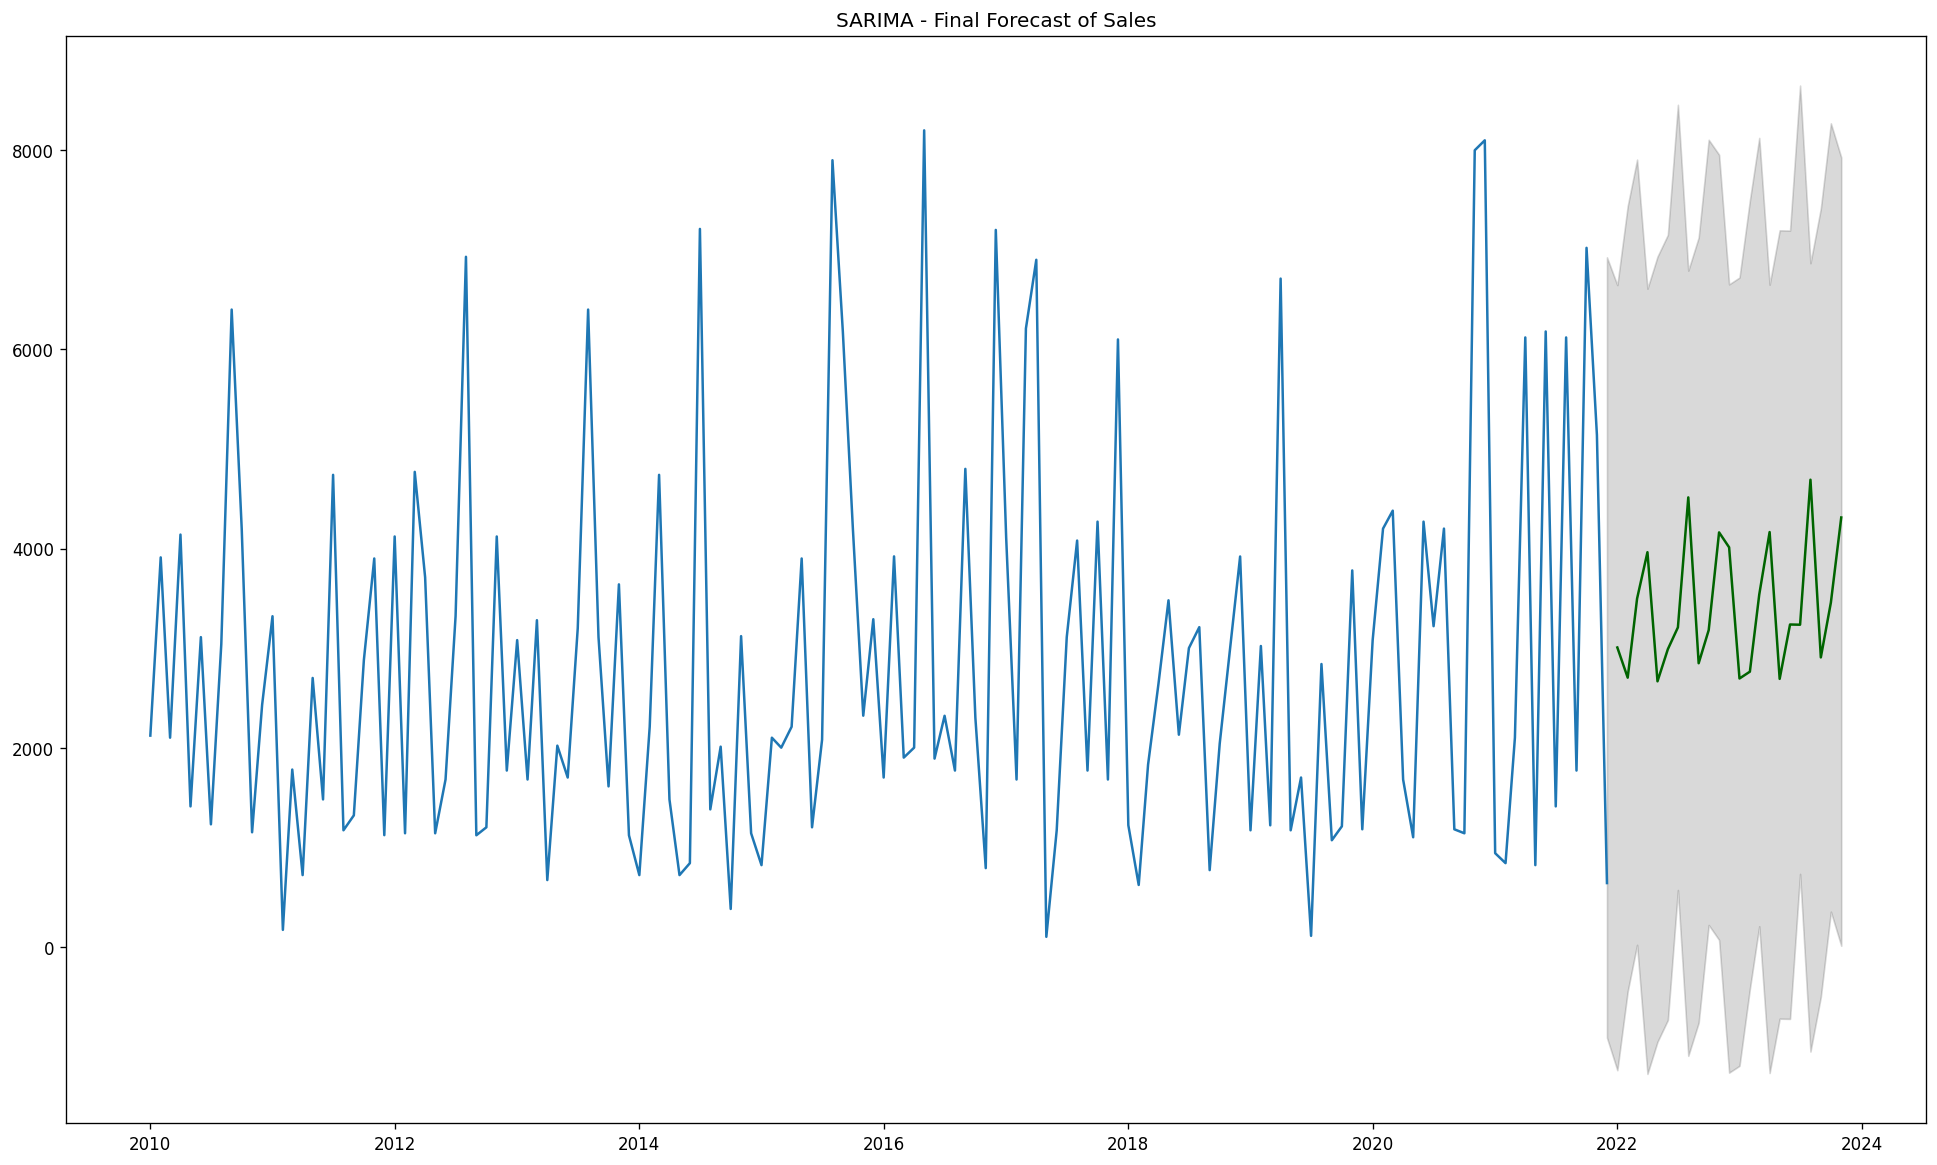

In [77]:

# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(20,12))
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Sales")
plt.show()

___